In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import matplotlib.image as mpimg

In [3]:
mat = loadmat('ex3data1.mat')
X = mat['X']
y = mat['y']

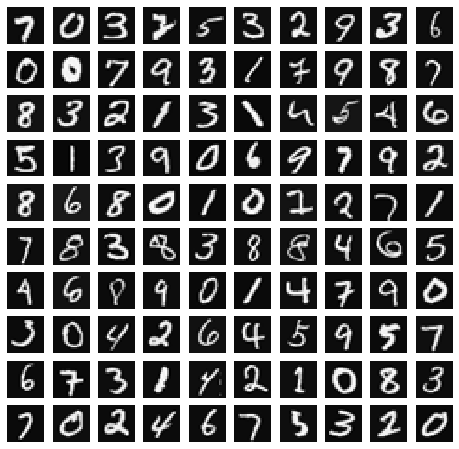

In [4]:
fig, axis = plt.subplots(10, 10, figsize = (8, 8))
for i in range(10):
    for j in range(10):
        axis[i,j].matshow(X[np.random.randint(0,5001),:].reshape(20,20, order = 'F'), cmap = 'gray')
        axis[i,j].axis("off")

In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [4]:
def CostFunction(X, y, theta, L):
    m = len(y)

    hypothesis = sigmoid(np.dot(X, theta))
    error = (y) * np.log(hypothesis) + (1-y) * np.log(1-hypothesis)
    J = -1/m * np.sum(error) + L/(2*m) * np.sum(theta[1:]**2)

    j0 = 1/m * np.dot(X.T, hypothesis - y)[0]
    j1 = 1/m * np.dot(X.T, hypothesis - y)[1:] + L/m * (theta[1:])

    gradient = np.vstack((j0[:,np.newaxis], j1))

    return J, gradient

In [7]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J, grad = CostFunction(X_t, y_t, theta_t, 3)
print("Cost:",J,"Expected cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: 2.534819396109744 Expected cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [ ]:
def GradientDescent(X, y, theta, alpha, iters, L):
    m = len(y)
    J_h = []

    for i in range(iters):
        J, gra = CostFunction(X, y, theta, L)
        J_h.append(J)
        theta = theta - alpha * gra

    return theta, J_h


In [ ]:
def OneVsAll(X, y, terms, L):
    m, n = X.shape[0], X.shape[1]
    theta_start = np.zeros((n+1, 1))

    X = np.hstack((np.ones((m, 1)), X))

    theta_list = []
    J_list = []
    for i in range(1, terms+1):
        theta, J = GradientDescent(X, np.where(y == i, 1, 0), theta_start, 1, 300, L)
        theta_list.extend(theta)
        J_list.extend(J)
    
    return np.array(theta_list).reshape(terms, n+1), J_list
    

In [ ]:
all_theta, all_J = OneVsAll(X, y, 10, 0.1)

In [ ]:
plt.plot(all_J[0:300])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [ ]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    predictions = np.dot(X, all_theta.T)
    return np.argmax(predictions,axis=1)+1

In [ ]:
pred = predictOneVsAll(all_theta, X)
print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, pred)
cm

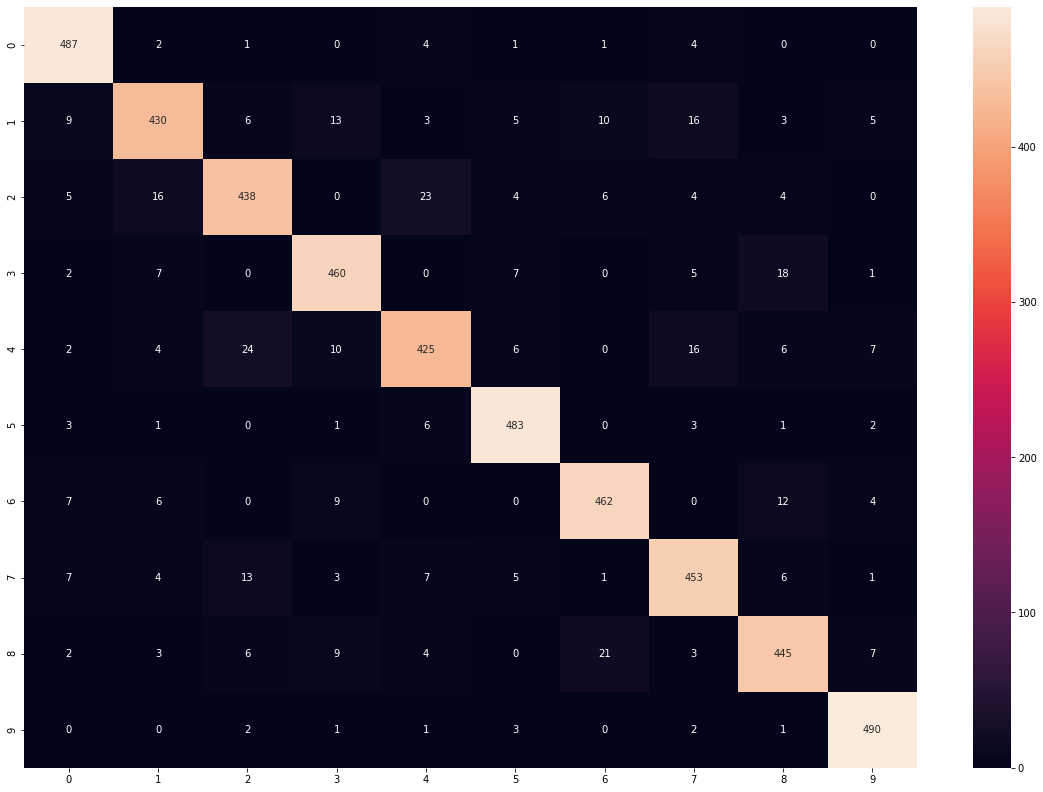

In [16]:
import seaborn as sn
plt.figure(figsize = (20,14))
sn.heatmap(cm, annot = True, fmt = 'g')
plt.show()